<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        NHANES - MTech Project 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em" >
        Machine learning Algorithms
          </h2>   
         <h3 style="color:#1a1a1a; font-size:2em" align="left">    Supervised Learning  </h3> 
         <h4 style="color:#1a1a1a; font-size:1em" align="left">    1. XGBoost Algorithm  </h4> 
         <h4 style="color:#1a1a1a; font-size:1em" align="left">    2. Random Forest Algorithm  </h4> 
         <h4 style="color:#1a1a1a; font-size:1em" align="left">    3. Logistic Regression  </h4> 
         <h4 style="color:#1a1a1a; font-size:1em" align="left">    4. Light Gradient Boosting Machine (Light GBM)  </h4> 
         <h4 style="color:#1a1a1a; font-size:1em" align="left">    5. Decision Tree Algorithm  </h4> 
         <h4 style="color:#1a1a1a; font-size:1em" align="left">    6. support vector machine (SVM)  </h4> 
        <h3 style="color:#1a1a1a; font-size:2em" align="left">   Unsupervised Supervised Learning  </h3> 
         <h4 style="color:#1a1a1a; font-size:1em" align="left">    1. K-Means Algorithm  </h4> 
       <h3 style="color:#1a1a1a;
                    font-size:2em">
        Prakash Easow Thomas - 2022DA04285 - August 2024
       </h3>
</center>

# 1. Importing Libraries and Reading the Datasets

## 1.1 Importing the Libraries

In [11]:
#!pip install lightgbm
#!pip install scikit-learn

In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle
import sklearn
import time

In [13]:
print(sklearn.__version__)
print(np.__version__)

1.2.2
1.26.4


## 1.2 Reading the Data Pre-processed dataset for Machine learning 

In [14]:
dataset_for_ML  = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Data\After_Feature_Selection_NoLab.csv')

In [15]:
dataset_for_ML.shape

(5951, 18)

In [16]:
dataset_for_ML.columns

Index(['RIDAGEYR', 'RIDRETH3', 'RIAGENDR', 'BMXBMI', 'DIQ175A', 'RHQ162',
       'DID260', 'BPXOSY1', 'BPXODI1', 'DMDEDUC3', 'DMDEDUC2', 'CBD765',
       'BPD035', 'IND235', 'RIDEXPRG', 'BMXWAIST',
       'Physically_Active_Classify', 'LBXGH_Classify'],
      dtype='object')

## 1.3 Listing the Features selected for Machine learning Processing 

In [17]:
df_fnd = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Field_Names_Details.csv')
filtered_df_fnd = df_fnd[df_fnd['Field Name '].isin(dataset_for_ML.columns)]
columns_to_select = ['File','Field Name ','Field Descriptions']
selected_filtered_df_fnd =filtered_df_fnd[columns_to_select]
selected_filtered_df_fnd.head(50)

,File,Field Name,Field Descriptions
3,Demographic,RIAGENDR,Gender
4,Demographic,RIDAGEYR,Age in years at screening
7,Demographic,RIDRETH3,Race/Hispanic origin w/ NH Asian
15,Demographic,DMDEDUC3,Education level - Children/Youth 6-19
16,Demographic,DMDEDUC2,Education level - Adults 20+
18,Demographic,RIDEXPRG,Pregnancy status at exam
521,Examination,BPXOSY1,Systolic - 1st oscillometric reading
522,Examination,BPXODI1,Diastolic - 1st oscillometric reading
539,Examination,BMXBMI,Body Mass Index (kg/m**2)
546,Examination,BMXWAIST,Waist Circumference (cm)


## 1.6 Reordering the Columns based on the correlation value with LBXGH

In [18]:
desired_order = ['Physically_Active_Classify','DIQ175A', 'CBD765', 'RIDEXPRG','RIDRETH3','DMDEDUC2','DMDEDUC3','BPXODI1','BMXWAIST','DID260','BMXBMI','BPXOSY1','BPD035','RIDAGEYR','RIAGENDR','RHQ162','LBXGH_Classify']
#desired_order = desired_order[::-1]
dataset_for_ML=dataset_for_ML.reindex(columns=desired_order)
dataset_for_ML = dataset_for_ML.drop(dataset_for_ML[dataset_for_ML['RIDRETH3'] !=  7].index)   # Others  
dataset_for_ML = dataset_for_ML.reset_index(drop=True)    
print(dataset_for_ML)

     Physically_Active_Classify  DIQ175A  CBD765  RIDEXPRG  RIDRETH3  \
0                             0      2.0     3.0       2.0       7.0   
1                             1      2.0     2.0       2.0       7.0   
2                             1      2.0     3.0       2.0       7.0   
3                             0      2.0     2.0       2.0       7.0   
4                             1      2.0     3.0       2.0       7.0   
..                          ...      ...     ...       ...       ...   
334                           0      2.0     1.0       2.0       7.0   
335                           0      2.0     3.0       2.0       7.0   
336                           1     10.0     3.0       2.0       7.0   
337                           0     10.0     2.0       2.0       7.0   
338                           1      2.0     3.0       2.0       7.0   

     DMDEDUC2  DMDEDUC3  BPXODI1  BMXWAIST  DID260  BMXBMI  BPXOSY1  BPD035  \
0         1.0       6.0     71.0      64.1     0.0    18

## 1.4 Drop Columns (If needed) 

In [19]:
drop_columns1=['CBD765']
dataset_for_ML = dataset_for_ML.drop(drop_columns1, axis=1)

## 1.5 Creating A dataframe for Storing the values 

In [20]:
df= pd.DataFrame()

# 2. Spliting the Train and Test Dataset

## 2.1 Creating the Data and the Target

In [21]:
y = dataset_for_ML['LBXGH_Classify']
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
334    0
335    1
336    1
337    1
338    0
Name: LBXGH_Classify, Length: 339, dtype: int64


In [22]:
drop_columns=['LBXGH_Classify']
X = dataset_for_ML.drop(drop_columns, axis=1)
print(X)

     Physically_Active_Classify  DIQ175A  RIDEXPRG  RIDRETH3  DMDEDUC2  \
0                             0      2.0       2.0       7.0       1.0   
1                             1      2.0       2.0       7.0       3.0   
2                             1      2.0       2.0       7.0       5.0   
3                             0      2.0       2.0       7.0       3.0   
4                             1      2.0       2.0       7.0       4.0   
..                          ...      ...       ...       ...       ...   
334                           0      2.0       2.0       7.0       1.0   
335                           0      2.0       2.0       7.0       4.0   
336                           1     10.0       2.0       7.0       5.0   
337                           0     10.0       2.0       7.0       3.0   
338                           1      2.0       2.0       7.0       1.0   

     DMDEDUC3  BPXODI1  BMXWAIST  DID260  BMXBMI  BPXOSY1  BPD035  RIDAGEYR  \
0         6.0     71.0      64.1

In [23]:
print (X.shape,' ' ,y.shape)

(339, 15)   (339,)


In [24]:
y.index

RangeIndex(start=0, stop=339, step=1)

## 2.2 Initilize KFold with 5 Splits

In [25]:
# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Train and Test the Data
## 3.1 XGBoost Algorithm

### 3.1.1 Initialize and Train the XGBoost Classifer

In [26]:
start_time = time.process_time()

In [27]:
# List to store accuracy for each fold
accuracies = []
# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.loc[test_index]
#    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Initialize the XGBoost classifier
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    # Train the model
    xgb_clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = xgb_clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f} %")
    # Store the accuracy
    accuracies.append(accuracy)

Accuracy: 75.00 %
Accuracy: 73.53 %
Accuracy: 72.06 %
Accuracy: 72.06 %
Accuracy: 73.13 %


In [28]:
end_time = time.process_time()
cpu_time = end_time - start_time
print(start_time,end_time,cpu_time)

26.234375 31.78125 5.546875


### 3.1.2 Accuracy Calculation

In [29]:
# Calculate the mean accuracy
mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f} %')

Mean Accuracy: 73.16 %


In [30]:
new_row1 = pd.DataFrame({'Features':[X.columns],'Algorithm' : ['XGBoost Algorithm'],'Accuracy' : [accuracies],'Mean_Accuracy' :[mean_accuracy * 100]})
#print(new_row1)
df=pd.concat([df,new_row1], ignore_index=True)

## 3.2 Random Forest Algorithm

### 3.2.1 Initialize and Train the Random Forest

In [31]:
start_time = time.process_time()
print(start_time)

31.828125


In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
rf_model.fit(X, y)
for element in rf_cv_scores:
    print(f"Accuracy: {element * 100:.2f} %")

Accuracy: 79.41 %
Accuracy: 77.94 %
Accuracy: 73.53 %
Accuracy: 80.88 %
Accuracy: 76.12 %


In [33]:
end_time = time.process_time()
cpu_time = end_time - start_time
print(start_time,end_time,cpu_time)

31.828125 34.28125 2.453125


### 3.2.2 Accuracy Calculation

In [34]:
# Calculate mean accuracy and standard deviation
mean_accuracy = np.mean(rf_cv_scores)
std_accuracy = np.std(rf_cv_scores)

print(f'Mean Accuracy: {mean_accuracy * 100 :.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 77.58 %
Standard Deviation: 0.03


In [35]:
new_row2 = pd.DataFrame({'Features':[X.columns],'Algorithm' : ['Random Forest Algorithm'],'Accuracy' : [rf_cv_scores],'Mean_Accuracy' :[mean_accuracy * 100]})
#print(new_row2)
df=pd.concat([df,new_row2], ignore_index=True)
#print(df)

## 3.3 Logistic Regression Algorithm

### 3.3.1 Initialize and Train the Logistic Regression

In [36]:
start_time = time.process_time()
print(start_time)

34.359375


In [37]:
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5)
lr_model.fit(X, y)
for element in lr_cv_scores:
    print(f"Accuracy: {element * 100:.2f} %")

Accuracy: 80.88 %
Accuracy: 80.88 %
Accuracy: 77.94 %
Accuracy: 83.82 %
Accuracy: 83.58 %


In [38]:
end_time = time.process_time()
cpu_time = end_time - start_time
print(start_time,end_time,cpu_time)

34.359375 39.6875 5.328125


### 3.3.2 Accuracy Calculation

In [39]:
# Calculate mean accuracy and standard deviation
mean_accuracy = np.mean(lr_cv_scores)
std_accuracy = np.std(lr_cv_scores)

print(f'Mean Accuracy: {mean_accuracy * 100 :.2f} %')
print(f'Standard Deviation: {std_accuracy:.2f}')

Mean Accuracy: 81.42 %
Standard Deviation: 0.02


In [40]:
new_row3 = pd.DataFrame({'Features':[X.columns],'Algorithm' : ['Logistic Regression Algorithm'],'Accuracy' : [lr_cv_scores],'Mean_Accuracy' :[mean_accuracy * 100]})
# print(new_row3)
df=pd.concat([df,new_row3], ignore_index=True)
# print(df)

## 3.4 Light Gradient Boosting Machine (Light GBM)

### 3.4.1 Initialize and Train the Light GBM

In [41]:
start_time = time.process_time()

In [42]:
dtrain = lgb.Dataset(X, label=y)
# Define parameters
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1
}
accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create LightGBM datasets
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    # Train the model
    num_round = 100
    bst = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data,test_data])
   # bst = lgb.train(params, train_data,num_boost_round=best_num_boost_rounds)
   
    # Make predictions
    y_pred = bst.predict(X_test)
    y_pred = [np.argmax(x) for x in y_pred]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [43]:
end_time = time.process_time()
cpu_time = end_time - start_time
print(start_time,end_time,cpu_time)

39.71875 121.34375 81.625


### 3.4.2 Accuracy Calculation

In [44]:
for element in accuracy_scores:
    print(f"Accuracy: {element * 100:.2f} %")
# Compute the average accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {mean_accuracy * 100:.2f}%")

Accuracy: 76.47 %
Accuracy: 69.12 %
Accuracy: 73.53 %
Accuracy: 70.59 %
Accuracy: 73.13 %
Average Accuracy: 72.57%


In [45]:
new_row4 = pd.DataFrame({'Features':[X.columns],'Algorithm' : ['Light GBM Algorithm'],'Accuracy' : [accuracy_scores],'Mean_Accuracy' :[mean_accuracy * 100]})
#print(new_row4)
df=pd.concat([df,new_row4], ignore_index=True)
#print(df)

## 3.5 Decision Tree (DT)

### 3.5.1 Initialize and Train the Decision Tree

In [46]:
start_time = time.process_time()
print(start_time)

121.375


In [47]:
decision_tree = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(decision_tree, X, y, cv=5)
#print("Cross-validation scores:", scores)
decision_tree.fit(X, y)
for element in dt_scores:
    print(f"Accuracy: {element * 100:.2f} %")

Accuracy: 66.18 %
Accuracy: 63.24 %
Accuracy: 70.59 %
Accuracy: 76.47 %
Accuracy: 68.66 %


In [48]:
end_time = time.process_time()
cpu_time = end_time - start_time
print(start_time,end_time,cpu_time)

121.375 121.484375 0.109375


### 3.5.2 Accuracy Calculation

In [49]:
# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(dt_scores)
print(f'\nMean cross-validation accuracy: {mean_accuracy* 100:.2f}')


Mean cross-validation accuracy: 69.03


In [50]:
new_row5 = pd.DataFrame({'Features':[X.columns],'Algorithm' : ['Decision Tree Algorithm'],'Accuracy' : [dt_scores],'Mean_Accuracy' :[mean_accuracy * 100]})
#print(new_row5)
df=pd.concat([df,new_row5], ignore_index=True)
#print(df)

start_time = time.process_time()## 3.6 Support Vector Machine (SVM)

### 3.6.1 Initialize and Train the Support Vector Machine

In [51]:
start_time = time.process_time()

In [52]:
# Perform 5-fold cross-validation using a for loop
fold_accuracies = []

# Initialize the SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the SVM model
    svm.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f'Fold accuracy: {accuracy:.2f}')



Fold accuracy: 0.85
Fold accuracy: 0.75
Fold accuracy: 0.81
Fold accuracy: 0.79
Fold accuracy: 0.79


In [53]:
end_time = time.process_time()
cpu_time = end_time - start_time
print(start_time,end_time,cpu_time)

121.578125 124.125 2.546875


### 3.6.2 Accuracy Calculation

In [54]:
# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean cross-validation accuracy: {mean_accuracy* 100:.2f}')

Mean cross-validation accuracy: 79.94


In [55]:
new_row6 = pd.DataFrame({'Features':[X.columns],'Algorithm' : ['Support Vector Machine (SVM)'],'Accuracy' : [fold_accuracies],'Mean_Accuracy' :[mean_accuracy * 100]})
#print(new_row6)
df=pd.concat([df,new_row6], ignore_index=True)
#print(df)

### 3.6.3 Train the model and draw a plot on decision Boundries

In [56]:
# Train the SVM model on the entire dataset
svm.fit(X, y)

SVC(kernel='linear', random_state=42)

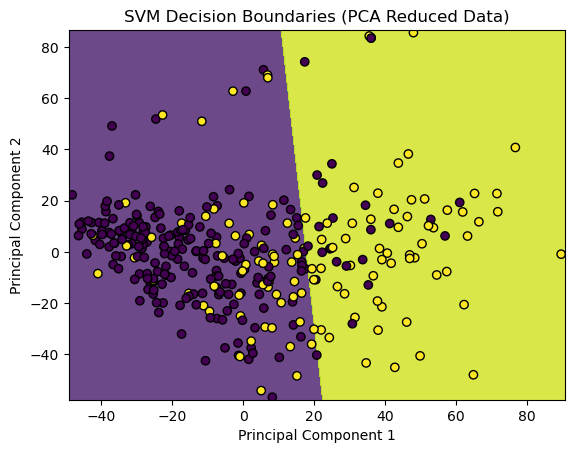

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

svm.fit(X_pca, y)

# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict classifications for each point in the mesh
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundaries (PCA Reduced Data)')
plt.show()

In [58]:
plt.savefig('svm_plot.png', dpi=300, bbox_inches='tight', transparent=True)

<Figure size 640x480 with 0 Axes>

# 5 Output

## 5.1 Wiriting to Output File

In [59]:
df.to_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Data\SLTraning_Values.csv',mode='a' ,index=False)

In [60]:
joblib.dump(xgb_clf,'xgb_DiabeticsPrediction.pkl')

['xgb_DiabeticsPrediction.pkl']

In [61]:
with open('randomf_DiabeticsPrediction.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [62]:
with open('logisticr_DiabeticsPrediction.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

In [63]:
joblib.dump(bst,'lightGBM_DiabeticsPrediction.pkl')

['lightGBM_DiabeticsPrediction.pkl']

In [64]:
with open('decision_DiabeticsPrediction.pkl', 'wb') as file:
    pickle.dump(decision_tree, file)

In [65]:
with open('svm_DiabeticsPrediction.pkl', 'wb') as file:
    pickle.dump(svm, file)

# 5 Unsupervised Learning
## 5.1 K-Means Algorithm
### 5.1.1 Initialize and Train the K-Means Algorithm

In [66]:
start_time = time.process_time()

In [67]:
# Initialize KFold cross-validator
kfUn = KFold(n_splits=5, shuffle=True, random_state=0)
# Number of clusters
n_clusters = 2
# Initialize list to store silhouette scores
silhouette_scores = []

# Perform 5-fold cross-validation
for train_index, test_index in kfUn.split(X):
    X_train, X_test = X.iloc[train_index], X.loc[test_index]
    
    # Fit k-Means on training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_train)
    
    # Predict cluster labels for the test fold
    labels = kmeans.predict(X_test)
    
    # Compute silhouette score
    score = silhouette_score(X_test, labels)
    silhouette_scores.append(score)

    print(f'Silhouette Score for fold: {score:.2f}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for fold: 0.29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for fold: 0.28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for fold: 0.36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for fold: 0.38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for fold: 0.25


In [68]:
end_time = time.process_time()
cpu_time = end_time - start_time
print(start_time,end_time,cpu_time)

874.15625 886.75 12.59375


In [69]:
# Print average silhouette score
average_score = np.mean(silhouette_scores)
print(f'Average Silhouette Score: {average_score:.2f}')
# Reduce the dimensionality of the data to 2 components for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# Fit k-Means on the entire dataset for visualization
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)
print(labels)

Average Silhouette Score: 0.31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0]


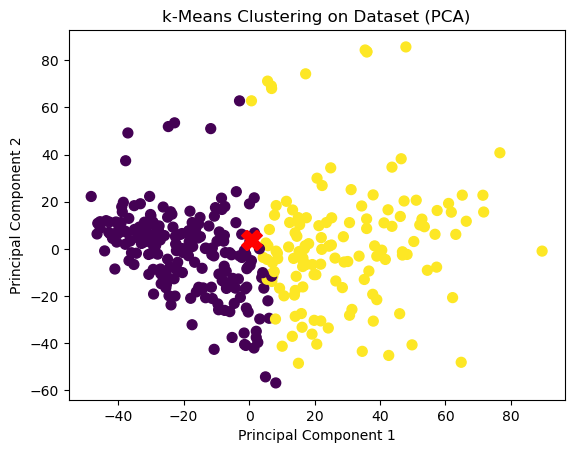

In [70]:
# Plot the clusters using the PCA-reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-Means Clustering on Dataset (PCA)')
plt.show()



# Optional: Plot clusters for the last fold
#plt.figure(figsize=(10, 6))
#plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, s=50, cmap='viridis')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('k-Means Clustering with 5-Fold Cross-Validation')
#plt.show()

In [71]:
with open('kmeans_DiabeticsPrediction.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [72]:
plt.show()

In [73]:
plt.savefig('kmeans_plot.png', dpi=300, bbox_inches='tight', transparent=True)

<Figure size 640x480 with 0 Axes>